In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


A smartphone-based system to passively
track a user's level of intoxication via accelerometer signals to
support the delivery of mobile just-in-time adaptive interventions
during heavy drinking events. Smartphone accelerometer readings and transdermal alcohol content (TAC) for 13 subjects in an alcohol consumption study were analyzed. The study used non-sensitive accelerometer data to detect periods of heavy drinking.


In [ ]:
import pandas as pd
df_acc = pd.read_csv('/content/drive/My Drive/all_accelerometer_data_pids_13.csv')

In [ ]:
df_acc

,time,pid,x,y,z
0,0,JB3156,0.000000,0.000000,0.000000
1,0,CC6740,0.000000,0.000000,0.000000
2,1493733882409,SA0297,0.075800,0.027300,-0.010200
3,1493733882455,SA0297,-0.035900,0.079400,0.003700
4,1493733882500,SA0297,-0.242700,-0.086100,-0.016300
...,...,...,...,...,...
14057562,1493829248196,CC6740,-0.133956,0.124726,-0.010736
14057563,1493829248220,CC6740,-0.100764,0.180872,0.046449
14057564,1493829248245,CC6740,-0.131853,0.195934,0.181088
14057565,1493829248270,CC6740,-0.149704,0.194482,0.202393


In [ ]:
df_tac = pd.read_csv('/content/drive/My Drive/BK7610_clean_TAC.csv')

In [ ]:
df_tac

,timestamp,TAC_Reading
0,1493718714,-0.000482
1,1493720697,0.001573
2,1493721027,0.002144
3,1493721357,0.000877
4,1493721686,-0.001145
5,1493722016,-0.002159
6,1493722345,-0.001033
7,1493722674,0.001808
8,1493723003,0.004542
9,1493724832,0.005185


In [ ]:
# Create the 'timestamp' column by dividing 'time' by 1000
df_acc['timestamp'] = df_acc['time'] // 1000

# Directly merge filtered df_acc with df_tac on 'timestamp' for PID = 'BK7610'
df_merged = pd.merge(df_acc[df_acc['pid'] == 'BK7610'], df_tac, on='timestamp')

# Display the first few rows of the merged dataframe
print(df_merged.head())


            time     pid       x       y       z   timestamp  TAC_Reading
0  1493737046023  BK7610  0.1410 -0.2686 -0.1372  1493737046     0.065357
1  1493737046063  BK7610  0.1714 -0.2722 -0.1208  1493737046     0.065357
2  1493737046073  BK7610  0.3328 -0.1353 -0.2548  1493737046     0.065357
3  1493737046101  BK7610  0.2822 -0.0375 -0.2816  1493737046     0.065357
4  1493737046134  BK7610  0.1847  0.1813 -0.2680  1493737046     0.065357


The code efficiently prepares the data for analysis involving the specific participant 'BK7610', allowing for detailed examination of their alcohol consumption (as measured by TAC) in relation to their physical activity (as inferred from accelerometer data) at specific times. The decision to filter by pid before merging is strategic for handling large datasets or focusing on specific subjects, reducing memory usage and potentially speeding up the merge operation.

In [ ]:
df_merged

,time,pid,x,y,z,timestamp,TAC_Reading
0,1493737046023,BK7610,0.1410,-0.2686,-0.1372,1493737046,0.065357
1,1493737046063,BK7610,0.1714,-0.2722,-0.1208,1493737046,0.065357
2,1493737046073,BK7610,0.3328,-0.1353,-0.2548,1493737046,0.065357
3,1493737046101,BK7610,0.2822,-0.0375,-0.2816,1493737046,0.065357
4,1493737046134,BK7610,0.1847,0.1813,-0.2680,1493737046,0.065357
...,...,...,...,...,...,...,...
669,1493767186893,BK7610,-0.0073,0.0220,-0.0166,1493767186,0.148265
670,1493767186919,BK7610,-0.0191,0.0071,-0.0289,1493767186,0.148265
671,1493767186943,BK7610,-0.0090,-0.0069,-0.0188,1493767186,0.148265
672,1493767186969,BK7610,0.0048,-0.0064,-0.0164,1493767186,0.148265


<ipython-input-10-6bf252a6ddf8>:4: RuntimeWarning: Second argument 'x' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  ax[0].plot("timestamp","x",data=df_merged)
<ipython-input-10-6bf252a6ddf8>:5: RuntimeWarning: Second argument 'y' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  ax[1].plot("timestamp","y",data=df_merged)


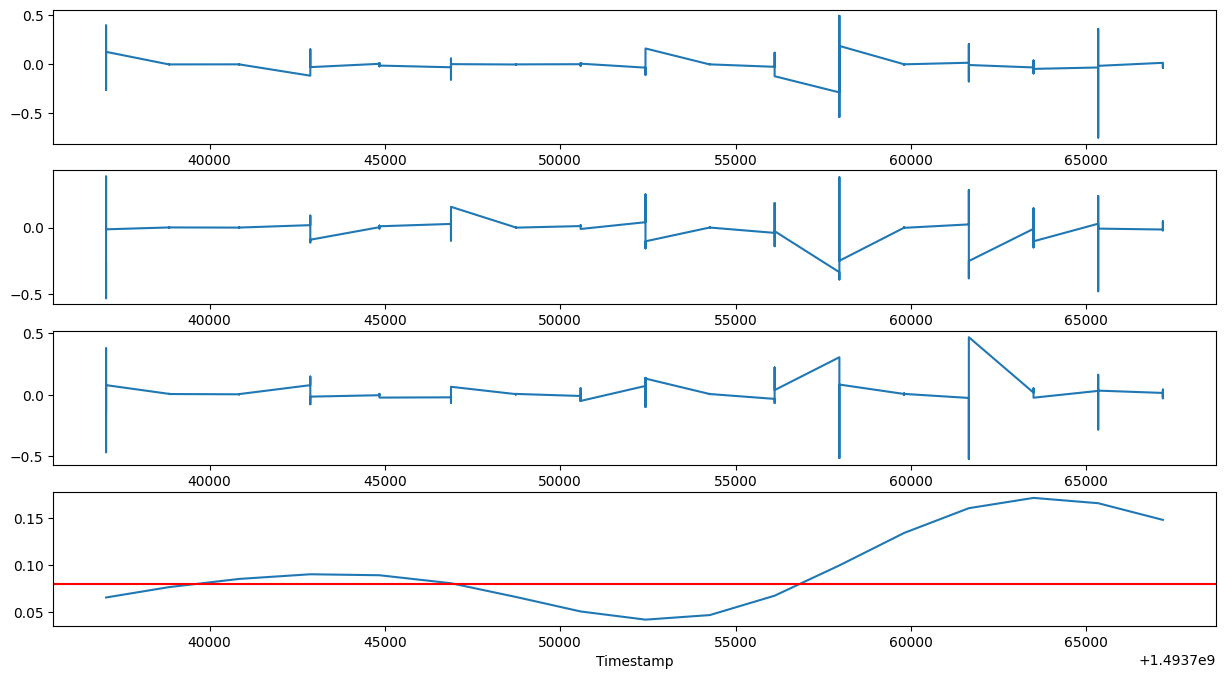

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(4, figsize=(15,8))
plt.xlabel("Timestamp")
ax[0].plot("timestamp","x",data=df_merged)
ax[1].plot("timestamp","y",data=df_merged)
ax[2].plot("timestamp","z",data=df_merged)
ax[3].plot("timestamp","TAC_Reading",data=df_merged)
ax[3].axhline(y=0.08, color='r', linestyle='-')
plt.show()

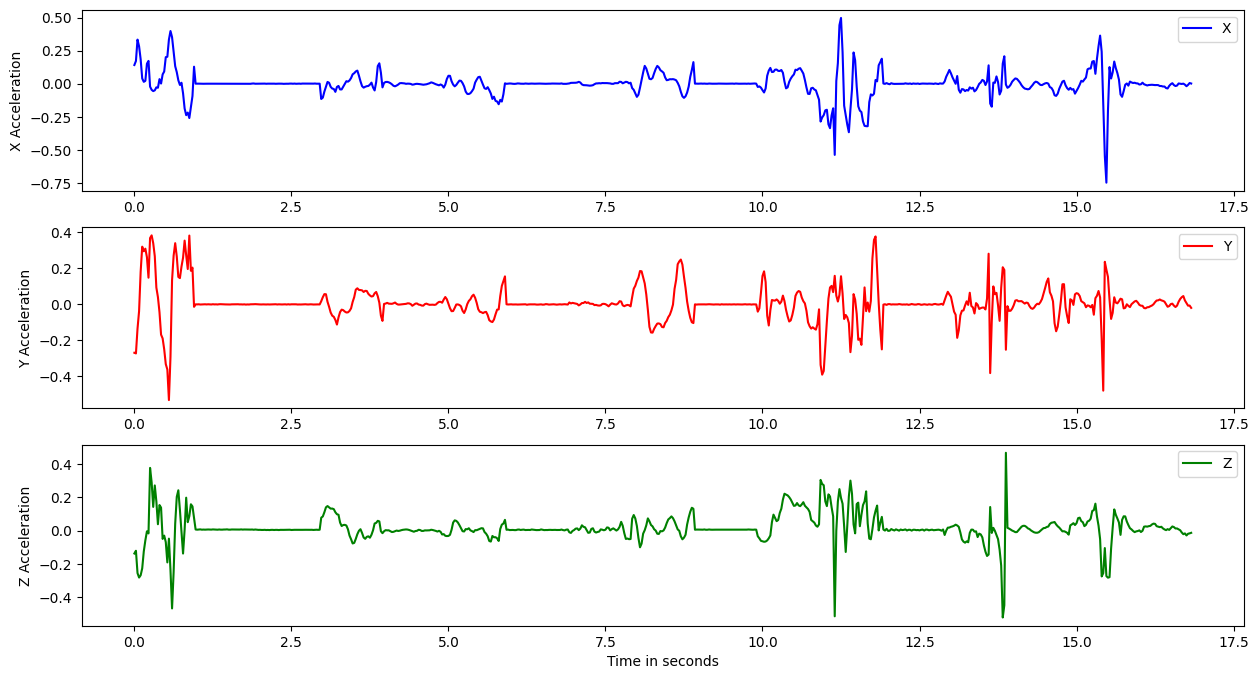

In [ ]:
import numpy as np
time = np.arange(df_merged['x'].size)/40
fig, ax = plt.subplots(3, figsize=(15,8))
plt.xlabel("Time in seconds")
ax[0].plot(time, df_merged["x"], label="X", color="blue")
ax[0].set_ylabel("X Acceleration")
ax[0].legend()

ax[1].plot(time, df_merged["y"], label="Y", color="red")
ax[1].set_ylabel("Y Acceleration")
ax[1].legend()

ax[2].plot(time, df_merged["z"], label="Z", color="green")
ax[2].set_ylabel("Z Acceleration")
ax[2].legend()

In [ ]:
def s_entropy(freq_list):
    ''' This function computes the shannon entropy of a given frequency distribution.
    USAGE: shannon_entropy(freq_list)
    ARGS: freq_list = Numeric vector representing the frequency distribution
    OUTPUT: A numeric value representing shannon's entropy'''
    freq_list = [element for element in freq_list if element != 0]
    sh_entropy = 0.0
    for freq in freq_list:
        sh_entropy += freq * np.log(freq)
    sh_entropy = -sh_entropy
    return(sh_entropy)

def ordinal_patterns(ts, embdim, embdelay):
    ''' This function computes the ordinal patterns of a time series for a given embedding dimension and embedding delay.
    USAGE: ordinal_patterns(ts, embdim, embdelay)
    ARGS: ts = Numeric vector representing the time series, embdim = embedding dimension (3<=embdim<=7 prefered range), embdelay =  embdding delay
    OUPTUT: A numeric vector representing frequencies of ordinal patterns'''
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts)

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*(m-1)):, :]
    permutation = np.argsort(partition)
    idx = _hash(permutation)

    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = (idx == i).sum()
    return list(counts[counts != 0].astype(int))

def _hash(x):
    m, n = x.shape
    if n == 1:
        return np.zeros(m)
    return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * np.math.factorial(n-1) + _hash(x[:, 1:])


def p_entropy(op):
    ordinal_pat = op
    max_entropy = np.log(len(ordinal_pat))
    p = np.divide(np.array(ordinal_pat), float(sum(ordinal_pat)))
    return(s_entropy(p)/max_entropy)

def complexity(op):
    ''' This function computes the complexity of a time series defined as: Comp_JS = Q_o * JSdivergence * pe
    Q_o = Normalizing constant
    JSdivergence = Jensen-Shannon divergence
    pe = permutation entopry
    ARGS: ordinal pattern'''
    pe = p_entropy(op)
    constant1 = (0.5+((1 - 0.5)/len(op)))* np.log(0.5+((1 - 0.5)/len(op)))
    constant2 = ((1 - 0.5)/len(op))*np.log((1 - 0.5)/len(op))*(len(op) - 1)
    constant3 = 0.5*np.log(len(op))
    Q_o = -1/(constant1+constant2+constant3)

    temp_op_prob = np.divide(op, sum(op))
    temp_op_prob2 = (0.5*temp_op_prob)+(0.5*(1/len(op)))
    JSdivergence = (s_entropy(temp_op_prob2) - 0.5 * s_entropy(temp_op_prob) - 0.5 * np.log(len(op)))
    Comp_JS = Q_o * JSdivergence * pe
    return(Comp_JS)

In [ ]:
# Initialize a dictionary to hold the segments
segments = {}

# Loop through each unique TAC_Reading value to create segments
for tac_value in df_merged['TAC_Reading'].unique():
    # Select the segment of df_merged where TAC_Reading equals the current tac_value
    segment = df_merged[df_merged['TAC_Reading'] == tac_value]

    # Store the segment in the dictionary with TAC_Reading as the key
    segments[tac_value] = segment

# Segments is a dictionary with each TAC_Reading value as a key and the corresponding



In [ ]:
# Iterate through all segments
for tac_value, segment in segments.items():
    print(f"Segment for TAC_Reading = {tac_value}")
    # Now 'segment' is the dataframe segment corresponding to the current 'tac_value'

    # Print the first few rows of each segment
    print(segment.head())


Segment for TAC_Reading = 0.0653566311750205
            time     pid       x       y       z   timestamp  TAC_Reading
0  1493737046023  BK7610  0.1410 -0.2686 -0.1372  1493737046     0.065357
1  1493737046063  BK7610  0.1714 -0.2722 -0.1208  1493737046     0.065357
2  1493737046073  BK7610  0.3328 -0.1353 -0.2548  1493737046     0.065357
3  1493737046101  BK7610  0.2822 -0.0375 -0.2816  1493737046     0.065357
4  1493737046134  BK7610  0.1847  0.1813 -0.2680  1493737046     0.065357
Segment for TAC_Reading = 0.0764619396581417
             time     pid       x       y       z   timestamp  TAC_Reading
39  1493738847013  BK7610  0.0001  0.0003  0.0069  1493738847     0.076462
40  1493738847038  BK7610  0.0003  0.0001  0.0057  1493738847     0.076462
41  1493738847063  BK7610  0.0002  0.0007  0.0069  1493738847     0.076462
42  1493738847088  BK7610 -0.0002 -0.0006  0.0076  1493738847     0.076462
43  1493738847113  BK7610  0.0002  0.0000  0.0057  1493738847     0.076462
Segment for TAC_

In [ ]:
# Segment the data by unique TAC_Reading
segments = {tac_value: df_merged[df_merged['TAC_Reading'] == tac_value] for tac_value in df_merged['TAC_Reading'].unique()}

# Initialize lists to store results
pe_results = []
comp_results = []

# Analyze each segment
for tac_value, segment in segments.items():
    # Assuming the analysis is to be performed on the 'x' column of each segment
    op = ordinal_patterns(segment['x'], 3, 1)
    pe = p_entropy(op)
    comp = complexity(op)

    # Append the results to the lists
    pe_results.append(pe)
    comp_results.append(comp)

    # Optionally, print out the results
    print(f"Segment for TAC_Reading = {tac_value}, PE: {pe}, Complexity: {comp}")


Segment for TAC_Reading = 0.0653566311750205, PE: 0.9009143363990059, Complexity: 0.08650308864235033
Segment for TAC_Reading = 0.0764619396581417, PE: 0.9893497337838473, Complexity: 0.010338040321521238
Segment for TAC_Reading = 0.08519669593783, PE: 0.9914550895366187, Complexity: 0.008397768877605967
Segment for TAC_Reading = 0.0901654782586229, PE: 0.8050445906162129, Complexity: 0.14912887791644674
Segment for TAC_Reading = 0.0891215869917304, PE: 0.8385034345615646, Complexity: 0.13016545585074668
Segment for TAC_Reading = 0.0805881161832726, PE: 0.8475574825773953, Complexity: 0.12567330520068112
Segment for TAC_Reading = 0.0659532707973154, PE: 0.8929367510524621, Complexity: 0.094573387487161
Segment for TAC_Reading = 0.0504236165425418, PE: 0.9128976932016455, Complexity: 0.08005558109476586
Segment for TAC_Reading = 0.0416892364132567, PE: 0.7717281264596043, Complexity: 0.17671470050424742
Segment for TAC_Reading = 0.0465593903717664, PE: 0.967383397812081, Complexity: 0.0

<ipython-input-12-f81b523fca2c>:37: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * np.math.factorial(n-1) + _hash(x[:, 1:])
<ipython-input-12-f81b523fca2c>:28: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  counts = np.zeros(np.math.factorial(m))


<ipython-input-12-f81b523fca2c>:37: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * np.math.factorial(n-1) + _hash(x[:, 1:])
<ipython-input-12-f81b523fca2c>:28: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  counts = np.zeros(np.math.factorial(m))


Segment for TAC_Reading = 0.0653566311750205, PE: 0.9009143363990059, Complexity: 0.08650308864235033
Segment for TAC_Reading = 0.0764619396581417, PE: 0.9893497337838473, Complexity: 0.010338040321521238
Segment for TAC_Reading = 0.08519669593783, PE: 0.9914550895366187, Complexity: 0.008397768877605967
Segment for TAC_Reading = 0.0901654782586229, PE: 0.8050445906162129, Complexity: 0.14912887791644674
Segment for TAC_Reading = 0.0891215869917304, PE: 0.8385034345615646, Complexity: 0.13016545585074668
Segment for TAC_Reading = 0.0805881161832726, PE: 0.8475574825773953, Complexity: 0.12567330520068112
Segment for TAC_Reading = 0.0659532707973154, PE: 0.8929367510524621, Complexity: 0.094573387487161
Segment for TAC_Reading = 0.0504236165425418, PE: 0.9128976932016455, Complexity: 0.08005558109476586
Segment for TAC_Reading = 0.0416892364132567, PE: 0.7717281264596043, Complexity: 0.17671470050424742
Segment for TAC_Reading = 0.0465593903717664, PE: 0.967383397812081, Complexity: 0.0

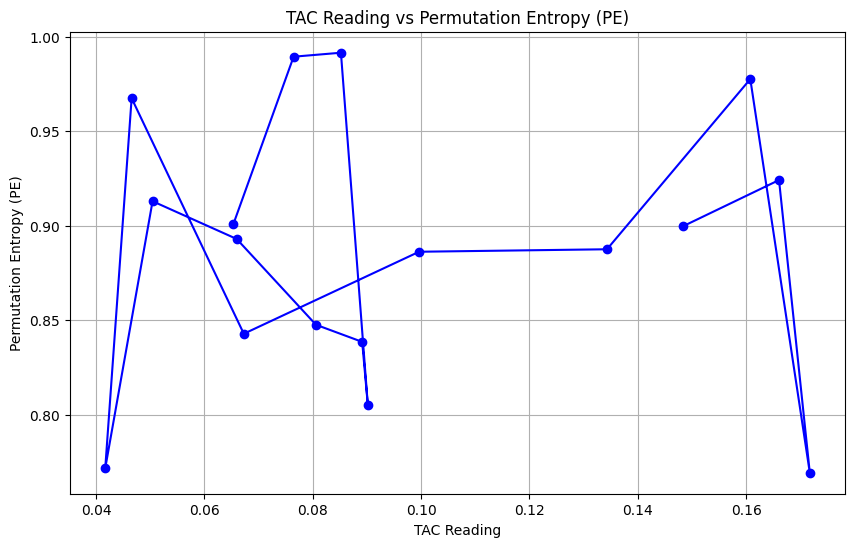

In [ ]:
import matplotlib.pyplot as plt
segments = {tac_value: df_merged[df_merged['TAC_Reading'] == tac_value] for tac_value in df_merged['TAC_Reading'].unique()}

# Initialize lists to store results
tac_values_list = []
pe_results = []
comp_results = []

# Analyze each segment
for tac_value, segment in segments.items():
    # Assuming the analysis is to be performed on the 'x' column of each segment
    op = ordinal_patterns(segment['x'], 3, 1)
    pe = p_entropy(op)
    comp = complexity(op)

    # Append the results to the lists
    tac_values_list.append(tac_value)  # Storing TAC Reading values
    pe_results.append(pe)
    comp_results.append(comp)

    # Optionally, print out the results
    print(f"Segment for TAC_Reading = {tac_value}, PE: {pe}, Complexity: {comp}")

# Plotting TAC Reading vs PE
plt.figure(figsize=(10, 6))  # Set the figure size as desired
plt.plot(tac_values_list, pe_results, marker='o', linestyle='-', color='blue')
plt.title('TAC Reading vs Permutation Entropy (PE)')
plt.xlabel('TAC Reading')
plt.ylabel('Permutation Entropy (PE)')
plt.grid(True)
plt.show()


**Variability in Permutation Entropy**: The relationship between TAC Reading and Permutation Entropy cannot be determined. There appears to be significant fluctuations in PE values across different TAC readings, which indicate intoxication levels. This suggests a non-uniform distribution of the ordinal patterns within the data segments represented by each TAC reading.

**No clear Trend**:There is no obvious ascending or descending trend that correlates TAC Readings with PE. The data does not suggest a simple linear relationship between TAC Reading and the entropy of the system.

**Potential Outliers**: There are points in the graph where PE is notably high or low relative to neighboring points. These could be outliers or important indicators of specific states or conditions that are worth further investigation.

Therefore, it can be inferred that TAC readings cannot be determined using PE values.

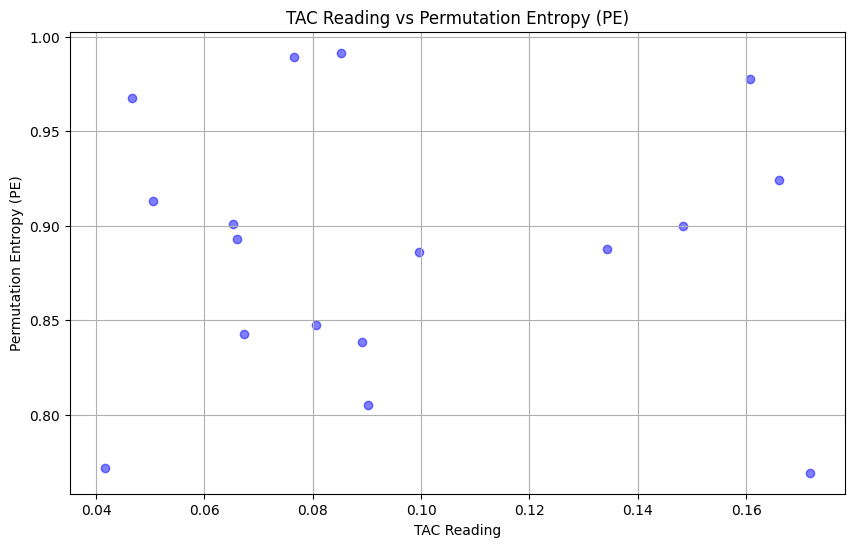

In [ ]:
import matplotlib.pyplot as plt
# Plotting TAC Reading vs PE using scatter plot
plt.figure(figsize=(10, 6))  # Set the figure size as desired
plt.scatter(tac_values_list, pe_results, color='blue', alpha=0.5)  # alpha controls the transparency
plt.title('TAC Reading vs Permutation Entropy (PE)')
plt.xlabel('TAC Reading')
plt.ylabel('Permutation Entropy (PE)')
plt.grid(True)
plt.show()


The graphs suggest that permutation entropy (PE) by itself does not show a clear and consistent relationship with TAC readings, which are used to indicate intoxication levels. Permutation entropy is a measure of the complexity of a signal. Here it is the motion data from accelerometers. For PE to be a reliable measure to differentiate between heavy drinking and sober states, you would typically expect to see a trend in the data where either higher or lower PE values consistently correspond with higher TAC readings indicative of heavy drinking.

Since the graphs do not demonstrate such a trend, this suggests that PE alone might not be a strong differentiator between heavy drinking and sober cases.

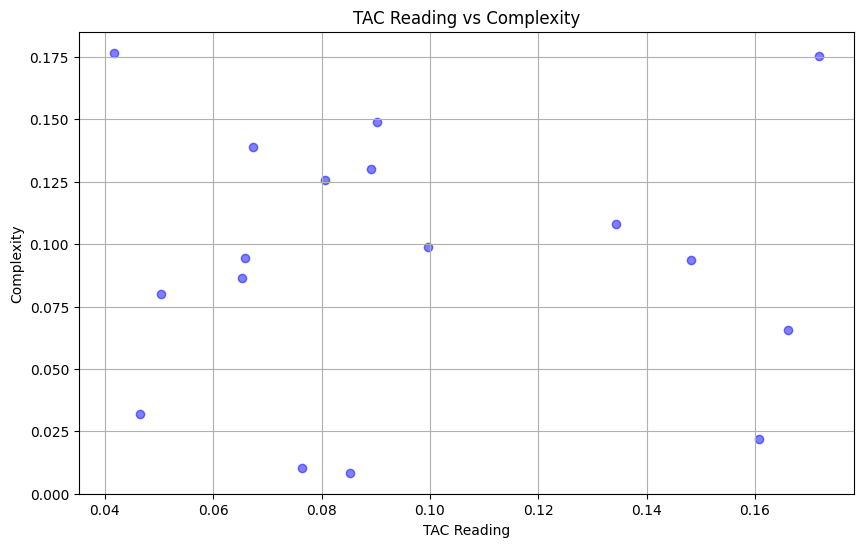

In [ ]:
 #Plotting TAC Reading vs Complexity using scatter plot
plt.figure(figsize=(10, 6))  # Set the figure size as desired
plt.scatter(tac_values_list, comp_results, color='blue', alpha=0.5)  # alpha controls the transparency
plt.title('TAC Reading vs Complexity')
plt.xlabel('TAC Reading')
plt.ylabel('Complexity')
plt.grid(True)
plt.show()


**No Clear Correlation**: As with the Permutation Entropy, there does not appear to be a clear linear correlation between TAC Reading values and Complexity. This suggests that the Complexity metric, like Permutation Entropy, may not directly relate to the TAC Reading in a simple way.

**Data Spread**: The points are widely spread across the graph, which might indicate that the Complexity is influenced by factors other than just TAC Reading.

**Variability of Complexity**: The Complexity seems to have a wide range for similar TAC Reading levels. For example, at a TAC Reading around 0.10, Complexity varies widely, suggesting that similar levels of transdermal alcohol content can result in varying levels of Complexity in the data.

**Outliers**: If there are any points that are significantly distant from the others (which cannot be determined without knowing the scales and full range of the plot), those could be considered outliers and might be worth investigating separately.




In [ ]:
#Categorization as 'intoxicated' or 'sober' based on TAC cut off value of 0.08
# Define the cutoff for being considered intoxicated
tac_cutoff = 0.08

# Iterate through all segments to classify each person's drinking level based on 'TAC_Reading'
for tac_value, segment in segments.items():
    # Use a copy to avoid SettingWithCopyWarning
    temp_segment = segment.copy()
    # Apply the classification logic
    temp_segment['drinking_level'] = temp_segment['TAC_Reading'].apply(
        lambda x: 'Intoxicated' if x > tac_cutoff else 'Sober'
    )
    # Update the segment in the dictionary
    segments[tac_value] = temp_segment

# Merge segments back to a DataFrame
merged_df_segmented = pd.concat(segments.values())


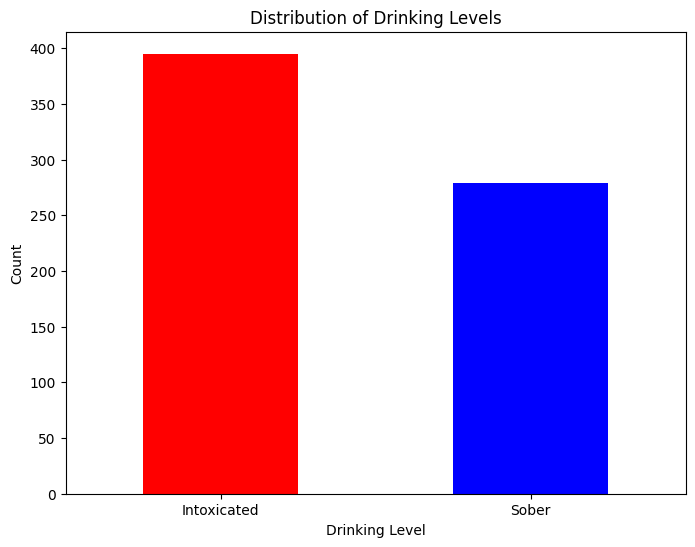

In [ ]:
#Visualization of categorization results using bar graph
import matplotlib.pyplot as plt

# Count the occurrences of each 'drinking_level'
drinking_level_counts = merged_df_segmented['drinking_level'].value_counts()

# Create a bar plot with specified colors for each category
plt.figure(figsize=(8, 6))
drinking_level_counts.plot(kind='bar', color=['red', 'blue'])  # 'blue' for 'Sober', 'red' for 'Intoxicated'
plt.title('Distribution of Drinking Levels')
plt.xlabel('Drinking Level')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep the labels on the x-axis readable
plt.show()


For the analyzed PID, there is a significant number of intoxicated observations and sober observations. However, the intoxicated observations are greater than sober. Since this dataset comes from a targeted intervention area, such as a bar crawling event, the nearly even split suggests that such locations could be effective points for interventions or educational campaigns.